# Textstat

Die Library textstat ist eine Python-Bibliothek zur Berechnung von Textstatistiken und Lesbarkeitskennzahlen. Sie bietet eine Sammlung von Funktionen, um verschiedene Metriken zur Beurteilung der Lesbarkeit und Komplexität von Texten zu berechnen. Die Bibliothek ist nützlich für die Analyse von Texten hinsichtlich ihrer Verständlichkeit und für das Vergleichen von Texten unterschiedlicher Lesbarkeit.

Die Sprache ist als Default auf Englisch ("en_US") eingestellt. Wenn eine andere Sprache untersucht werden soll, kann diese über eine Funktion ausgewählt werden. 
Die Sprache wird dann zur Silbenberechnung und zur Auswahl der Formelvariante verwendet.

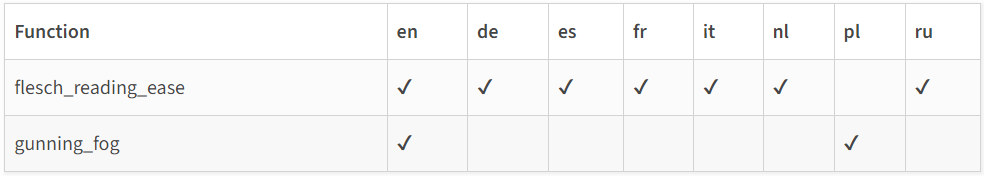



Für Arabisch und Spanisch gibt es nochmal eigene Funktionen

Quellen:

- https://pypi.org/project/textstat/
- https://github.com/textstat/textstat
- https://github.com/textstat/textstat/blob/main/textstat/textstat.py
- https://web.archive.org/web/20160712094308/http://www.mang.canterbury.ac.nz/writing_guide/writing/flesch.shtml

# Laden der Daten

In [1]:
# Imports
import os
import json
import pandas as pd
import textstat
import matplotlib.pyplot as plt

# Zu untersuchende Sprache festlegen
lang = "de-DE"
textstat.set_lang(lang)

# Laden der Sprachen
df_language = pd.read_csv('../Sprachen.csv')

In [2]:
# Pfad der JSONS ermitteln
folder = "../Data/atticus/"
list_files = os.listdir(folder)

# Laden der Files
data = []
for path in list_files:
    path_complete = folder + "//" + path
    with open(path_complete,'r', encoding="utf-8-sig") as file:
        obj = json.load(file)
        data.append(obj)

# Extraktion der Deutschen Übersetzungen aus den JSON Files
data_container = {
    'Language': [],
    'Source-Text':[],
    'Translation': [],
  }

# Auslesen der Dictionaries
for obj in data:
    for el in obj:
      for translation in el["Translations"]:
          source_text = el["Text"]
          translated_text = translation['Text']
          lang = translation['Language'].split('-')[0]
          data_container["Language"].append(lang)
          data_container["Source-Text"].append(source_text)
          data_container["Translation"].append(translated_text)

# Speichern in einen Data Frame
df_res = pd.DataFrame.from_dict(data_container)

# Hinzufügen der ausgeschriebenen Ländernamen
df_merged = pd.merge(df_res, df_language, on='Language', how='left').drop(columns=['Language']).rename(columns={'language_name': 'Language'})
df_german = df_merged[df_merged['Language'] == 'German']

# Duplikate entfernen
df_german = df_german.drop_duplicates(subset="Source-Text").reset_index().drop(columns=['index'])
# Ausgabe
df_german

,Source-Text,Translation,Language
0,Model number: 11PRO FGSports category: FOOTBAL...,Modellnummer: 11PRO FGSportkategorie: FOOTBALL...,German
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German
2,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German
3,Ask a Question,Eine Frage stellen,German
4,Model number: WU661Sports category: CoreA quar...,Modellnummer: WU661Sportkategorie: CoreEin Vie...,German
...,...,...,...
7625,Model number: LZQ25 Sport category: SKATEBOARD...,Modellnummer: LZQ25 Sportkategorie: SKATEBOARD...,German
7626,Model number: MDU22Sports category: SKATEBOARD...,Modellnummer: MDU22Sport Kategorie: SKATEBOARD...,German
7627,Model number: LIJ40Sports category: GOLFComfor...,Modellnummer: LIJ40Sportkategorie: GOLFKomfort...,German
7628,Model number: MDV17Sports category: SWIMUnique...,Modellnummer: MDV17Sportkategorie: SCHWIMMENEi...,German


# Analyse der Übersetzungsqualität

## Flesch Reading Ease:

--> Bestimmt, wie einfach ein Text zu lesen ist unter Berücksichtigung der Anzahl der Silben, Wörter und Sätze.

Die Anzahl der Wörter, Silben und Sätze im Text werden gezählt. Anschließend berechnet er die durchschnittliche Anzahl der Wörter pro Satz und die durchschnittliche Anzahl der Silben pro Wort. Die Idee ist, dass kürzere Wörter und kürzere Sätze leichter zu lesen sind

Die Formel lautet:

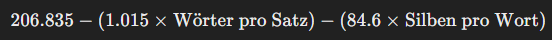

Score:
| Punktzahl      | Schulniveau         | Anmerkungen                                                                |
|----------------|---------------------|----------------------------------------------------------------------------|
| 100,00-90,00   | 5. Klasse           | Sehr einfach zu lesen. Für einen durchschnittlichen 11-jährigen Schüler leicht verständlich. |
| 90,0–80,0      | 6. Klasse           | Leicht zu lesen. Konversationsenglisch für Verbraucher.                     |
| 80,0–70,0      | 7. Klasse           | Ziemlich einfach zu lesen.                                                  |
| 70,0–60,0      | 8. und 9. Klasse    | Einfaches Englisch. Für 13- bis 15-jährige Schüler leicht verständlich.     |
| 60,0–50,0      | 10. bis 12. Klasse  | Ziemlich schwer zu lesen.                                                   |
| 50,0–30,0      | Hochschule          | Schwer zu lesen.                                                            |
| 30,0–0,0       | Hochschulabsolvent  | Sehr schwer zu lesen. Am besten für Hochschulabsolventen verständlich.      |

Die höchste mögliche Punktzahl beträgt 121,22. Sie wird erreicht, wenn jeder Satz nur ein einsilbiges Wort enthält. Es gibt keine Untergrenze für diese Punktzahl. Einige sehr komplizierte Sätze können negative Punktzahlen haben.

Parameterübersicht:
- fre_base: Basiswert für den Flesch-Lesbarkeitsindex. Der Basiswert variiert je nach Sprache, da unterschiedliche Sprachen unterschiedliche durchschnittliche Satz- und Wortstrukturen haben.
- fre_sentence_length: Gewichtungsfaktor für die durchschnittliche Satzlänge. Dieser Wert zeigt an, wie stark die Satzlänge die Lesbarkeit beeinflusst.
- fre_syll_per_word: Gewichtungsfaktor für die durchschnittliche Anzahl der Silben pro Wort. Dieser Wert gibt an, wie stark die Anzahl der Silben pro Wort die Lesbarkeit beeinflusst.
- syllable_threshold: Schwellenwert ab welcher Anzahl von Silben pro Wort ein Wort als „schwierig“ gilt. Berücksichtigung komplexer Wörter in der Lesbarkeitsanalyse.

        "en": {"fre_base": 206.835, "fre_sentence_length": 1.015, "fre_syll_per_word": 84.6,"syllable_threshold": 3,}
        "de": {"fre_base": 180, "fre_sentence_length": 1, "fre_syll_per_word": 58.5,}


In [3]:
# Erstellen der Score Bereiche
data_readability = {
     "Score": ["101-121", "90-100", "80-89", "70-79", "60-69", "50-59", "30-49", " <0-29"],
     "Difficulty": ["Grundschule", "5 Klasse", "6 Klasse", "7 Klasse", "8/9 Klasse", "10/12 Klasse", "Hochschulstudenten", "Hochschulabsolventen"],
     "Color": ["darkgreen", "green", "lightgreen", "yellowgreen", "yellow", "orange", "red", "darkred"]
}
df_readability = pd.DataFrame(data_readability)

# Erstellen von Intervallen basierend auf den Score-Bereichen
score_bins = [-500, 29, 49, 59, 69, 79, 89, 100, 121]
score_labels = df_readability['Difficulty']

In [4]:
# Definiere der Funktion
def flesch_reading_ease(translated_text):
    return textstat.flesch_reading_ease(translated_text)

# Anwendung der Funktion
df_fre = df_german.copy()
df_fre['flesch_reading_ease'] = df_fre['Translation'].apply(flesch_reading_ease)

# Ergänzung der Score Bezeichnungen
df_fre['Difficulty'] = pd.cut(df_fre['flesch_reading_ease'], bins=score_bins, labels=score_labels)

# Ausgabe
#df_fre

C:\Users\sandra.nuissl\AppData\Local\Temp\ipykernel_20092\1989050591.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fre_grouped_df = df_fre.groupby('Difficulty').agg({


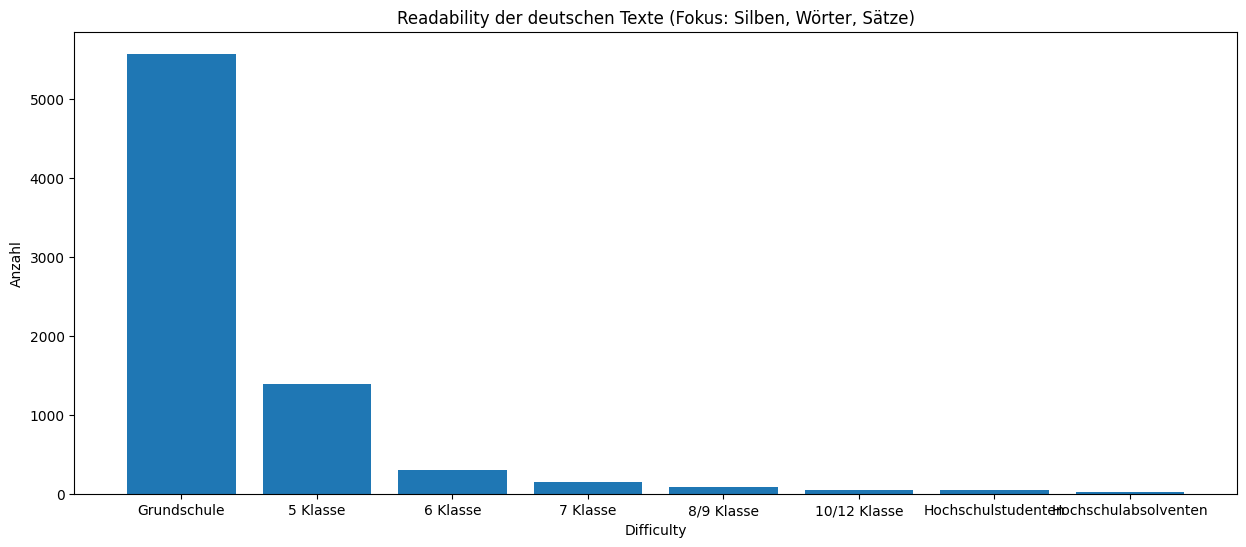

In [5]:
# Graphik
# Gruppieren nach Score Stufen
fre_grouped_df = df_fre.groupby('Difficulty').agg({
    'flesch_reading_ease': 'count',
}).reset_index().rename(columns={'flesch_reading_ease': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(fre_grouped_df['Difficulty'], fre_grouped_df['Anzahl'])
plt.title("Readability der deutschen Texte (Fokus: Silben, Wörter, Sätze)")
plt.xlabel('Difficulty')
plt.ylabel('Anzahl')
plt.show()


## Flesch-Kincaid Grade

--> Notwendige Jahre für Schulische Bildung, um den Text zu verstehen

Berücksichtigt die Anzahl der Wörter pro Satz und die Anzahl der Silben pro Wort. 

Die Formel lautet:


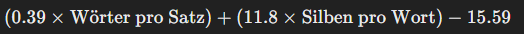

Die Formel für die Klassenstufe betont die Satzlänge gegenüber der Wortlänge. Durch die Erstellung von Ein-Wort-Zeichenfolgen mit Hunderten von zufälligen Zeichen können Klassenstufen erreicht werden, die hundertmal höher sind als die High-School- Abschlussklassen in den Vereinigten Staaten. Aufgrund der Konstruktion der Formel hat die Punktzahl keine Obergrenze.

In [6]:
# Definiere der Funktion
def flesch_kincaid_grade(translated_text):
    return textstat.flesch_kincaid_grade(translated_text)

# Anwendung der Funktion
df_fkg = df_german.copy()
df_fkg['flesch_kincaid_grade'] = df_fkg['Translation'].apply(flesch_kincaid_grade)

# Ausgabe
#df_fkg

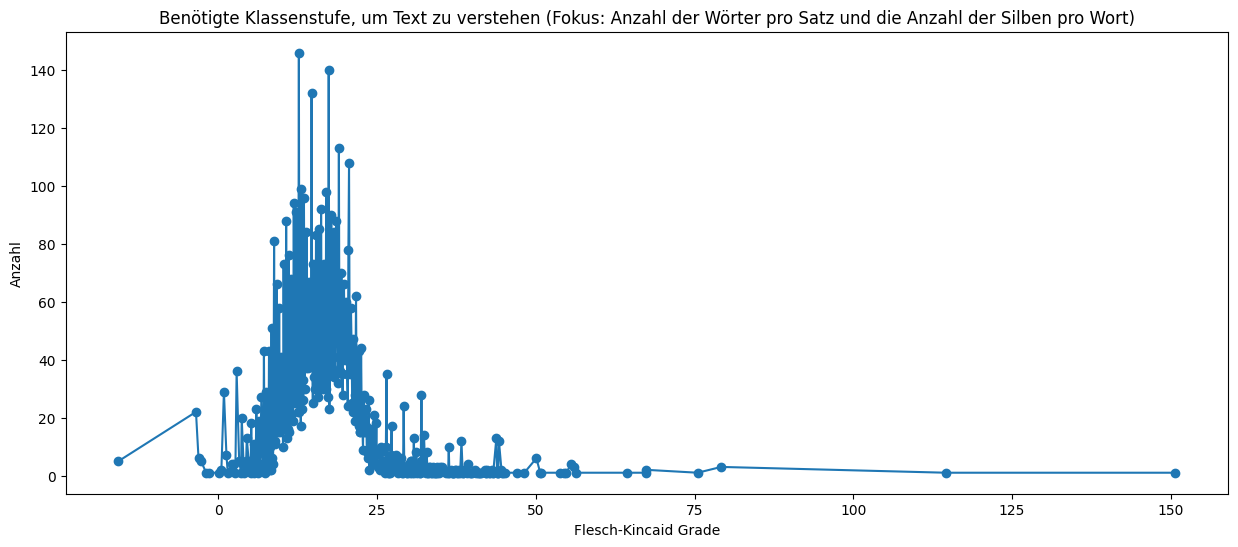

In [7]:
# Graphik
# Gruppieren nach Score Stufen
fkg_grouped_df = df_fkg.groupby('flesch_kincaid_grade')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.plot(fkg_grouped_df['flesch_kincaid_grade'], fkg_grouped_df['Anzahl'], marker='o')
plt.title("Benötigte Klassenstufe, um Text zu verstehen (Fokus: Anzahl der Wörter pro Satz und die Anzahl der Silben pro Wort)")
plt.xlabel('Flesch-Kincaid Grade')
plt.ylabel('Anzahl')
plt.show()

## SMOG Index

--> Anzahl der Jahre Bildung, die erforderlich sind, um den Text zu verstehen.

Berechnet basierend auf der Anzahl der polysyllabischen Wörter (Wörter mit drei oder mehr Silben) in einer Stichprobe von 30 Sätzen. 

Die Formel lautet:

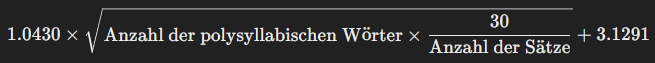

Ein höherer Wert zeigt eine komplexere Sprache an. Bracht min. 3 Sätze für ein Aussagekräftiges Ergebnis.

In [8]:
# Definiere der Funktion
def smog_index(translated_text):
    return textstat.smog_index(translated_text)

# Anwendung der Funktion
df_smog = df_german.copy()
df_smog['smog_index'] = df_smog['Translation'].apply(smog_index)
df_smog['smog_index'] = df_smog['smog_index'].round().astype(int)

# Ausgabe
#df_smog

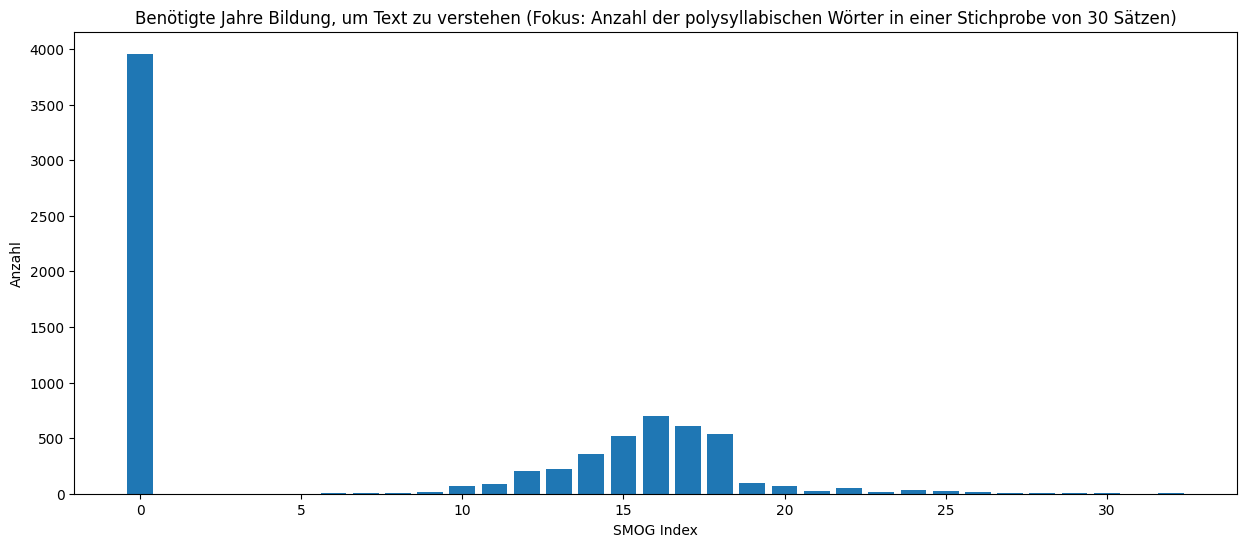

In [9]:
# Graphik
# Gruppieren nach Score Stufen
smog_grouped_df = df_smog.groupby('smog_index')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(smog_grouped_df['smog_index'], smog_grouped_df['Anzahl'])
plt.title("Benötigte Jahre Bildung, um Text zu verstehen (Fokus: Anzahl der polysyllabischen Wörter in einer Stichprobe von 30 Sätzen)")
plt.xlabel('SMOG Index')
plt.ylabel('Anzahl')
plt.show()

## Gunning Fog

--> Anzahl der Jahre formaler Bildung, die erforderlich sind, um den Text zu verstehen. Ein höherer Wert zeigt eine schwierigere Lesbarkeit an.

Berücksichtigt die Anzahl der Wörter pro Satz und die Anzahl der Wörter mit drei oder mehr Silben. 

Die Formel lautet:

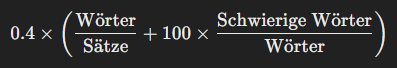

Hier würde noch ein Vokabular für einfache Wörter in Englisch benötigt werden!

In [10]:
# Definiere der Funktion
def gunning_fog(translated_text):
    return textstat.gunning_fog(translated_text)

# Anwendung der Funktion
df_gf = df_german.copy()
df_gf['gunning_fog'] = df_gf['Translation'].apply(gunning_fog)
df_gf['gunning_fog'] = df_gf['gunning_fog'].round().astype(int)

# Ausgabe
#df_gf

c:\Users\sandra.nuissl\Desktop\EvaluationOfTranslation\venv\Lib\site-packages\textstat\textstat.py:1489: Warning: There is no easy words vocabulary for de-DE, using english.
  warnings.warn(


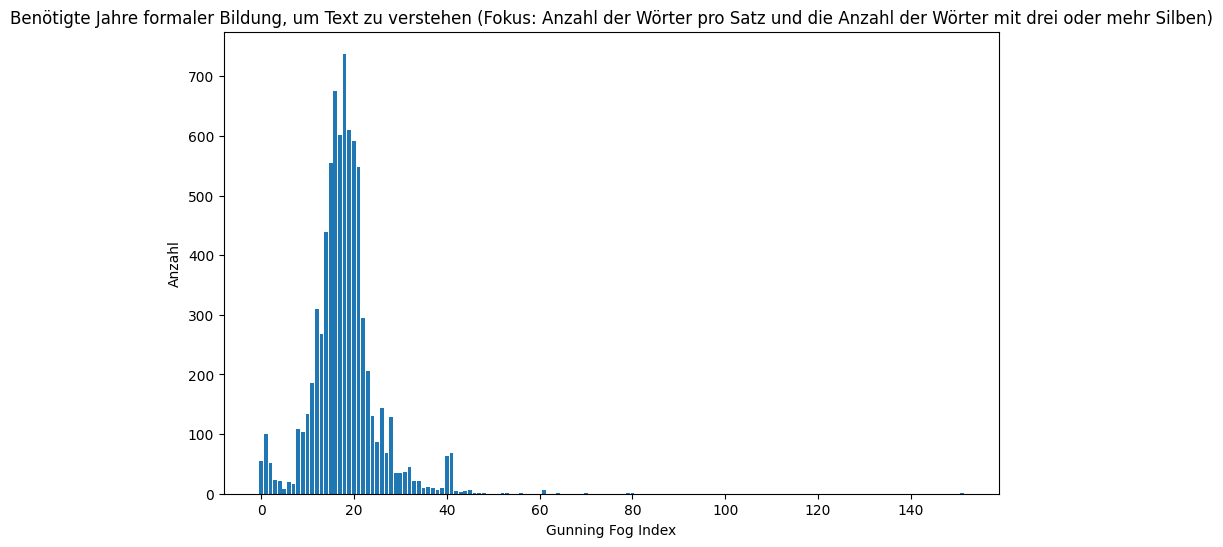

In [11]:
# Graphik
# Gruppieren nach Score Stufen
gf_grouped_df = df_gf.groupby('gunning_fog')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(10, 6))
plt.bar(gf_grouped_df['gunning_fog'], gf_grouped_df['Anzahl'])
plt.title("Benötigte Jahre formaler Bildung, um Text zu verstehen (Fokus: Anzahl der Wörter pro Satz und die Anzahl der Wörter mit drei oder mehr Silben)")
plt.xlabel('Gunning Fog Index')
plt.ylabel('Anzahl')
plt.show()

In [12]:
result = df_gf[df_gf['gunning_fog'] == 151]['Translation']
print(result)

979    Modell # Artikelnummern Modellname BX461 HY835...
Name: Translation, dtype: object


## Automated Readability Index

--> Lesbarkeitsbewertung, die die Schulstufe angibt, die erforderlich ist, um den Text zu verstehen unter Berücksichtigung der Anzahl der Zeichen pro Wort und die Anzahl der Wörter pro Satz.

Die Formel lautet:

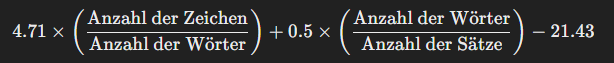

Ein höherer Wert zeigt komplexere Sprache an.

In [13]:
# Definiere der Funktion
def automated_readability_index(translated_text):
    return textstat.automated_readability_index(translated_text)

# Anwendung der Funktion
df_ari = df_german.copy()
df_ari['automated_readability_index'] = df_ari['Translation'].apply(automated_readability_index)
df_ari['automated_readability_index'] = df_ari['automated_readability_index'].round().astype(int)

# Ausgabe
#df_ari

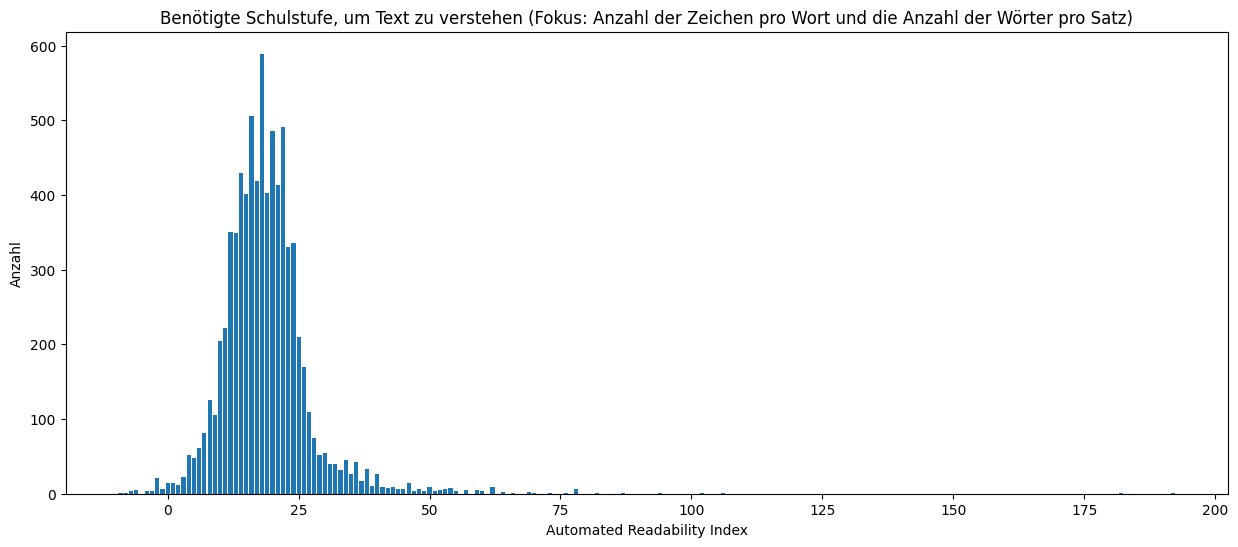

In [14]:
# Graphik
# Gruppieren nach Score Stufen
ari_grouped_df = df_ari.groupby('automated_readability_index')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(ari_grouped_df['automated_readability_index'], ari_grouped_df['Anzahl'])
plt.title("Benötigte Schulstufe, um Text zu verstehen (Fokus: Anzahl der Zeichen pro Wort und die Anzahl der Wörter pro Satz)")
plt.xlabel('Automated Readability Index')
plt.ylabel('Anzahl')
plt.show()

## Coleman-Liau Index
--> Die Schulstufe, die erforderlich ist, um den Text zu verstehen mit Betonung auf den Einfluss der Zeichen und Buchstaben auf die Lesbarkeit.

Berücksichtigt die Anzahl der Buchstaben pro 100 Wörter und die Anzahl der Sätze pro 100 Wörter. 

Die Formel lautet:



In [15]:
# Definiere der Funktion
def coleman_liau_index(translated_text):
    return textstat.coleman_liau_index(translated_text)

# Anwendung der Funktion
df_cli = df_german.copy()
df_cli['coleman_liau_index'] = df_cli['Translation'].apply(coleman_liau_index)
df_cli['coleman_liau_index'] = df_cli['coleman_liau_index'].round().astype(int)

# Ausgabe
#df_cli

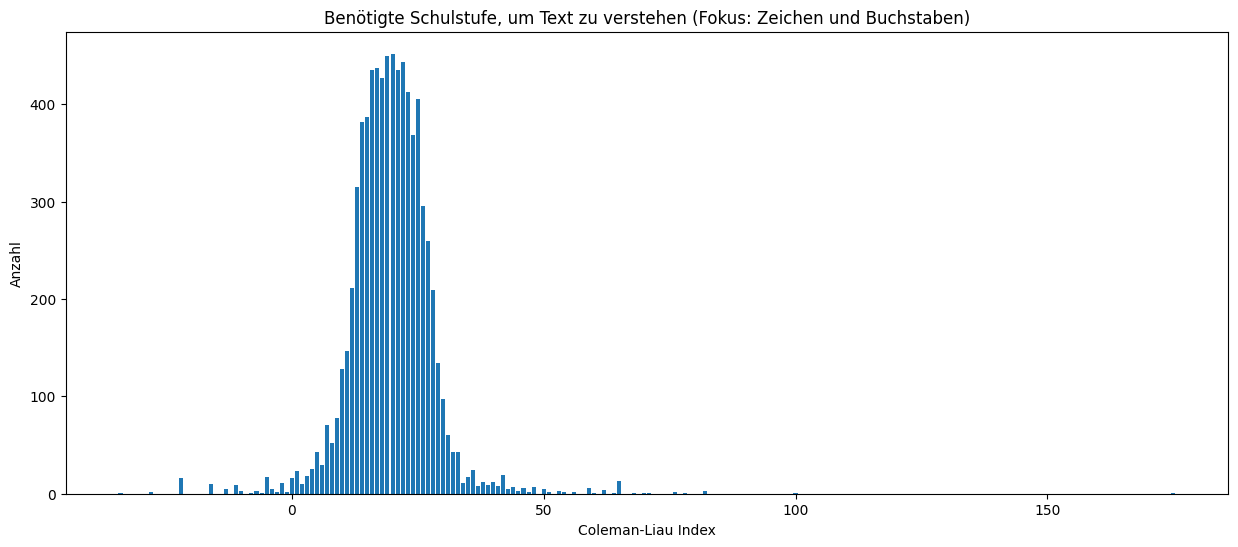

In [16]:
# Graphik
# Gruppieren nach Score Stufen
cli_grouped_df = df_cli.groupby('coleman_liau_index')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(cli_grouped_df['coleman_liau_index'], cli_grouped_df['Anzahl'])
plt.title("Benötigte Schulstufe, um Text zu verstehen (Fokus: Zeichen und Buchstaben)")
plt.xlabel('Coleman-Liau Index')
plt.ylabel('Anzahl')
plt.show()

## Dale-Chall Readability Score

--> Schwierigkeit eines Textes, auf Basis der  Bekanntheit der Wörter (Anzahl der "schwiereigen Wörter")
 
Es wird eine Liste von ca. 3000 Wörtern abgeglichen, welche von 4. Klässlern verstanden wird. Alle wörter, welche nicht in dieser Liste auftauchen, werden als schwierig gewertet.

Quelle: https://readabilityformulas.com/word-lists/the-dale-chall-word-list-for-readability-formulas/#google_vignette

Die Formel lautet:

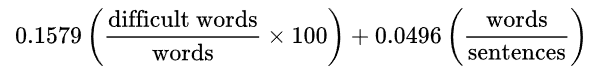

Berücksichtigt die Prozentsätze schwieriger Wörter und die durchschnittliche Satzlänge.

| Score        | Understood by                              |
|--------------|--------------------------------------------|
| 4.9 or lower | average 4th-grade student or lower         |
| 5.0–5.9      | average 5th or 6th-grade student           |
| 6.0–6.9      | average 7th or 8th-grade student           |
| 7.0–7.9      | average 9th or 10th-grade student          |
| 8.0–8.9      | average 11th or 12th-grade student         |
| 9.0–9.9      | average 13th to 15th-grade (college) student|


In [17]:
# Definiere der Funktion
def dale_chall_readability_score(translated_text):
    return textstat.dale_chall_readability_score(translated_text)

# Anwendung der Funktion
df_dcrs = df_german.copy()
df_dcrs['dale_chall_readability_score'] = df_dcrs['Translation'].apply(dale_chall_readability_score)
df_dcrs['dale_chall_readability_score'] = df_dcrs['dale_chall_readability_score'].round().astype(int)

# Ausgabe
#df_dcrs

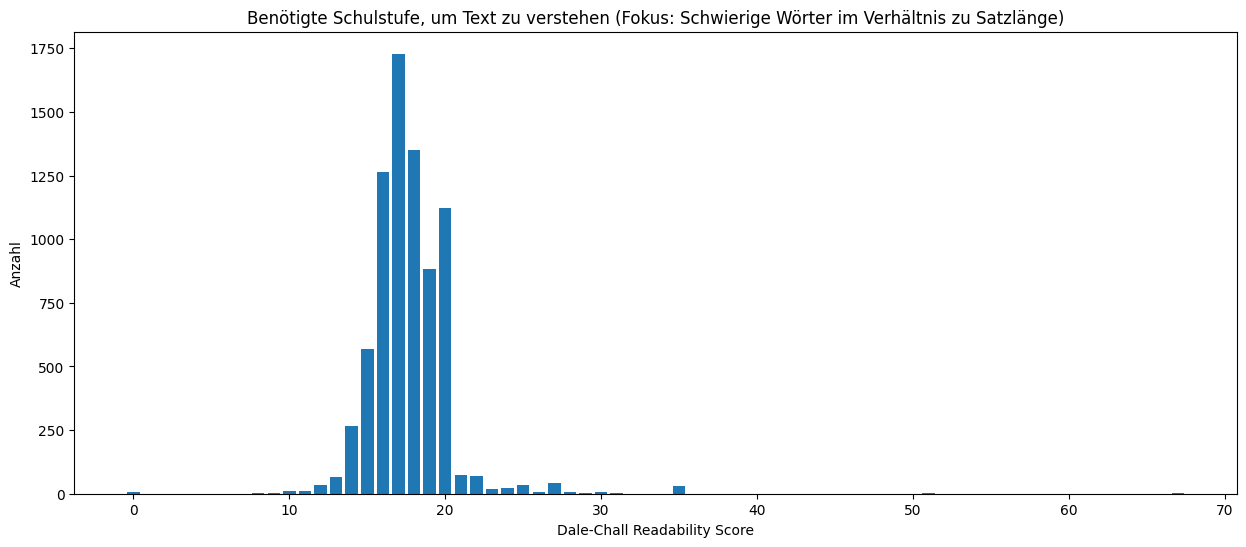

In [18]:
# Graphik
# Gruppieren nach Score Stufen
dcrs_grouped_df = df_dcrs.groupby('dale_chall_readability_score')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(dcrs_grouped_df['dale_chall_readability_score'], dcrs_grouped_df['Anzahl'])
plt.title("Benötigte Schulstufe, um Text zu verstehen (Fokus: Schwierige Wörter im Verhältnis zu Satzlänge)")
plt.xlabel('Dale-Chall Readability Score')
plt.ylabel('Anzahl')
plt.show()

## Difficult Words

--> Die Anzahl der Wörter im Text, die als schwierig gelten (meist polysyllabische Wörter).

Berücksichtigt werden:

- Anzahl der Wörter mit mehr als zwei Silben oder Wörter
- Wörter, die in einem bestimmten Wörterbuch als schwierig gelistet sind

In [19]:
# Definiere der Funktion
def difficult_words(translated_text):
    return textstat.difficult_words(translated_text)

# Anwendung der Funktion
df_dw = df_german.copy()
df_dw['difficult_words'] = df_dw['Translation'].apply(difficult_words)
df_dw['difficult_words'] = df_dw['difficult_words'].round().astype(int)

# Ausgabe
#df_dw

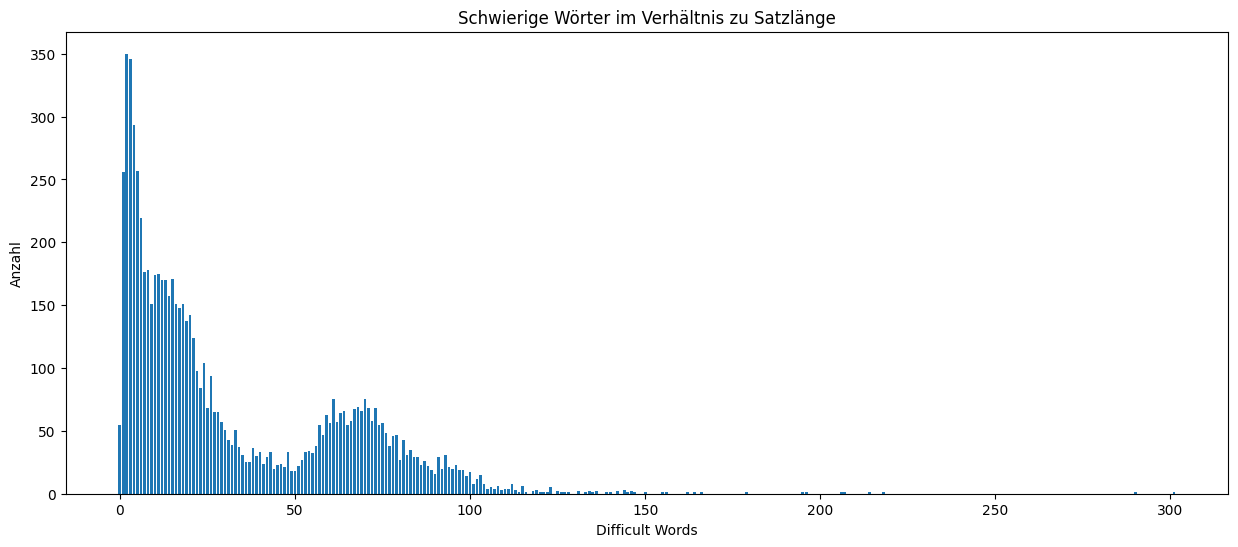

In [20]:
# Graphik
# Gruppieren nach Score Stufen
dw_grouped_df = df_dw.groupby('difficult_words')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(dw_grouped_df['difficult_words'], dw_grouped_df['Anzahl'])
plt.title("Schwierige Wörter im Verhältnis zu Satzlänge")
plt.xlabel('Difficult Words')
plt.ylabel('Anzahl')
plt.show()

In [21]:
difficult = df_dw[df_dw['difficult_words'] == 50]['Translation']
print(difficult)

151     WAS IST NEU &amp; STORYTELLINGCON22 OFF-PITCH ...
407     Modellnummer: E5879Kategorie Sport: ORIGINALSD...
864     Modellnummer: DKL19 Sportkategorie: GOLF Ein a...
1089    Modellnummer: DTN80Kategorie Sport: SPORTSWEAR...
1734    Das Paar, zu dem du immer wieder zurückkehrst,...
1759    Modellnummer: LZB15 Sport-Kategorie: CORE Ener...
2203    "Untethered" bedeutet, dass Sie von allem befr...
3109    Modellnummer: ECL32 Sportkategorie: SPORTSWEAR...
3120    Modellnummer: DJT49 Sport-Kategorie: SPORTSWEA...
3705    Als Teil der Bemühungen von adidas, Plastikmül...
3904    Die New York Red Bulls arbeiten mit Daniel Pat...
3937    Das neue Community-Trikot der Seattle Sounders...
4717    Modell-Nummer: NLB50Sportkategorie: FOOTBALL/F...
4734    Modellnummer: JMQ70Kategorie Sport: ORIGINALSE...
5604    WAS IST NEU &amp; STORYTELLINGStoffe und Silho...
6474    Die moderne Welt ist voller Druck und Stressfa...
6839    Modellnummer: BXH44Kategorie Sport: TRAININGEi...
6858    Modell

## Linsear Write Formula

--> Lesbarkeit eines Textes basierend auf der Anzahl der Sätze und der Anzahl der längeren Wörter

Die Formel lautet:

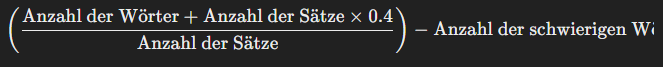

Berücksichtigt die Anzahl der Wörter in einfachen und komplexen Sätzen. 

In [22]:
# Definiere der Funktion
def linsear_write_formula(translated_text):
    return textstat.linsear_write_formula(translated_text)

# Anwendung der Funktion
df_lwf = df_german.copy()
df_lwf['linsear_write_formula'] = df_lwf['Translation'].apply(linsear_write_formula)
df_lwf['linsear_write_formula'] = df_lwf['linsear_write_formula'].round().astype(int)

# Ausgabe
#df_lwf

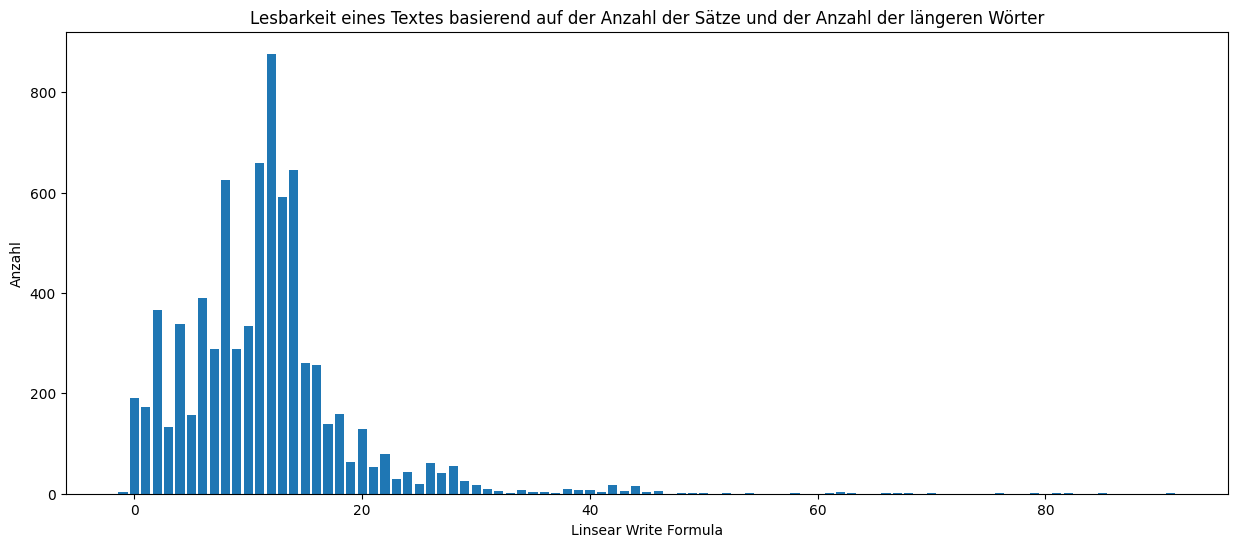

In [23]:
# Graphik
# Gruppieren nach Score Stufen
lwf_grouped_df = df_lwf.groupby('linsear_write_formula')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(lwf_grouped_df['linsear_write_formula'], lwf_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes basierend auf der Anzahl der Sätze und der Anzahl der längeren Wörter")
plt.xlabel('Linsear Write Formula')
plt.ylabel('Anzahl')
plt.show()

## Spache Readability Formula

Bestimmt das Sprachlevel, welches Benötigt wird, um einen Text zu verstehen.
Der Fokus liegt hier auf Texten für Kinder bis zur 4. Klasse. (Für anspruchsvollere Texte Dale-Chall Index verwenden)

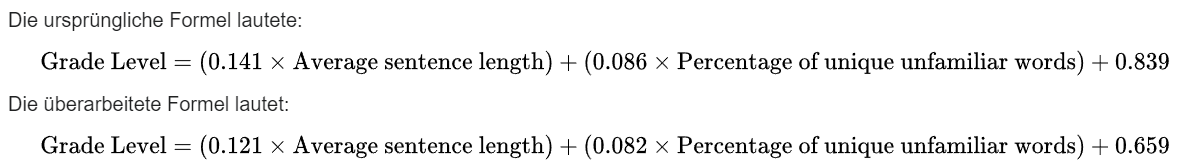

In [24]:
# Definiere der Funktion
def spache_readability(translated_text):
    return textstat.spache_readability(translated_text)

# Anwendung der Funktion
df_sr = df_german.copy()
df_sr['spache_readability'] = df_sr['Translation'].apply(spache_readability)
df_sr['spache_readability'] = df_sr['spache_readability'].round().astype(int)

# Ausgabe
#df_sr

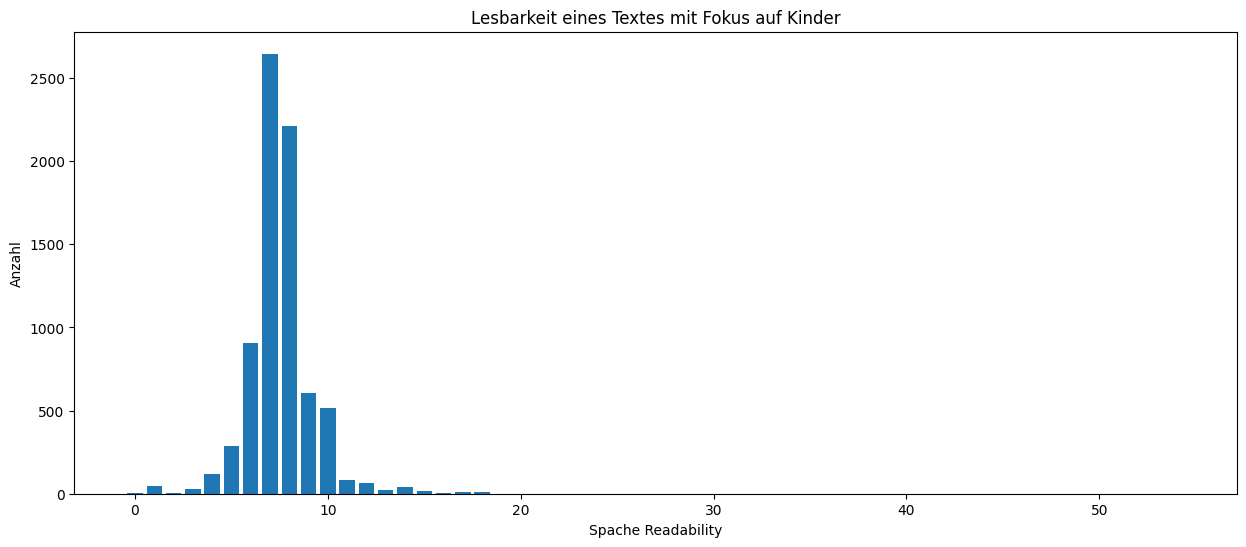

In [25]:
# Graphik
# Gruppieren nach Score Stufen
sr_grouped_df = df_sr.groupby('spache_readability')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(sr_grouped_df['spache_readability'], sr_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes mit Fokus auf Kinder")
plt.xlabel('Spache Readability')
plt.ylabel('Anzahl')
plt.show()

## McAlpine EFLAW Readability Score

--> Bewertung der Eignung von Texten für nicht-muttersprachliche Englischlerner im akademischen Kontext

Fokus: Wortlänge, Satzlänge, Vokabularkomplexität und grammatikalische Strukturen (Keine spezielle Formel, sondern Zusammenfassung von Rahmenwerk)


In [26]:
# Definiere der Funktion
def mcalpine_eflaw(translated_text):
    return textstat.mcalpine_eflaw(translated_text)

# Anwendung der Funktion
df_me = df_german.copy()
df_me['mcalpine_eflaw'] = df_me['Translation'].apply(mcalpine_eflaw)
df_me['mcalpine_eflaw'] = df_me['mcalpine_eflaw'].round().astype(int)

# Ausgabe
#df_me

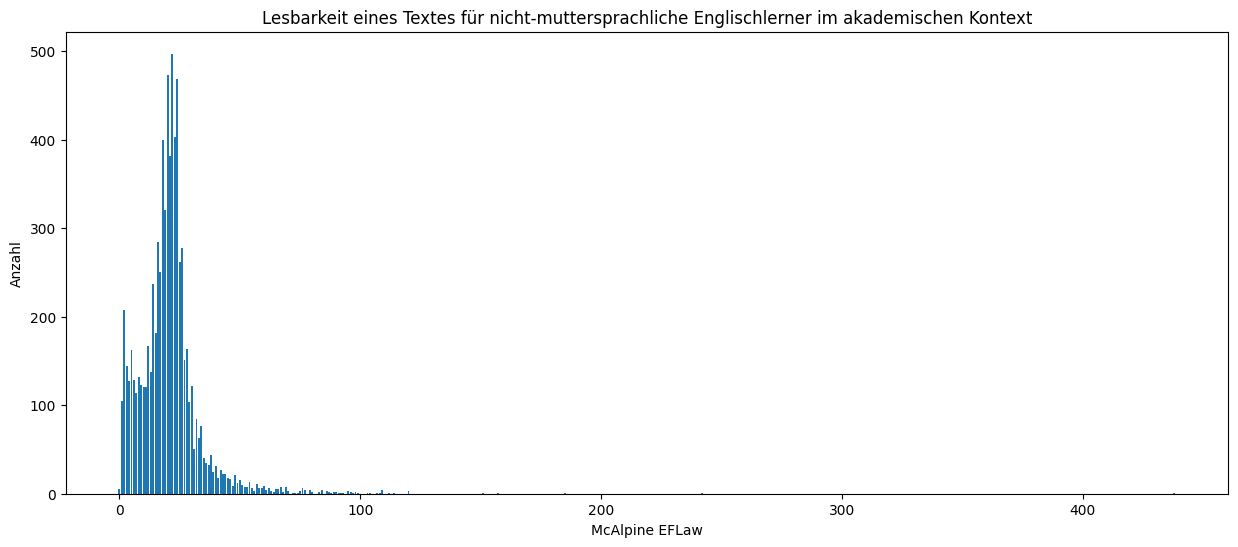

In [27]:
# Graphik
# Gruppieren nach Score Stufen
me_grouped_df = df_me.groupby('mcalpine_eflaw')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(me_grouped_df['mcalpine_eflaw'], me_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes für nicht-muttersprachliche Englischlerner im akademischen Kontext")
plt.xlabel('McAlpine EFLaw')
plt.ylabel('Anzahl')
plt.show()

## Crawford-Index

--> Bewertung der Lesbarkeit von Texten, die auf einer bestimmten Formel basiert, um die Verständlichkeit und Komplexität des Textes zu beurteilen. Die genaue Formel und Methodik können je nach Implementierung variieren, aber allgemein bewertet der Crawford-Index, wie schwierig ein Text für eine bestimmte Zielgruppe zu lesen ist.

In [28]:
# Definiere der Funktion
def crawford(translated_text):
    return textstat.crawford(translated_text)

# Anwendung der Funktion
df_c = df_german.copy()
df_c['crawford'] = df_c['Translation'].apply(crawford)
df_c['crawford'] = df_c['crawford'].round().astype(int)

# Ausgabe
#df_c

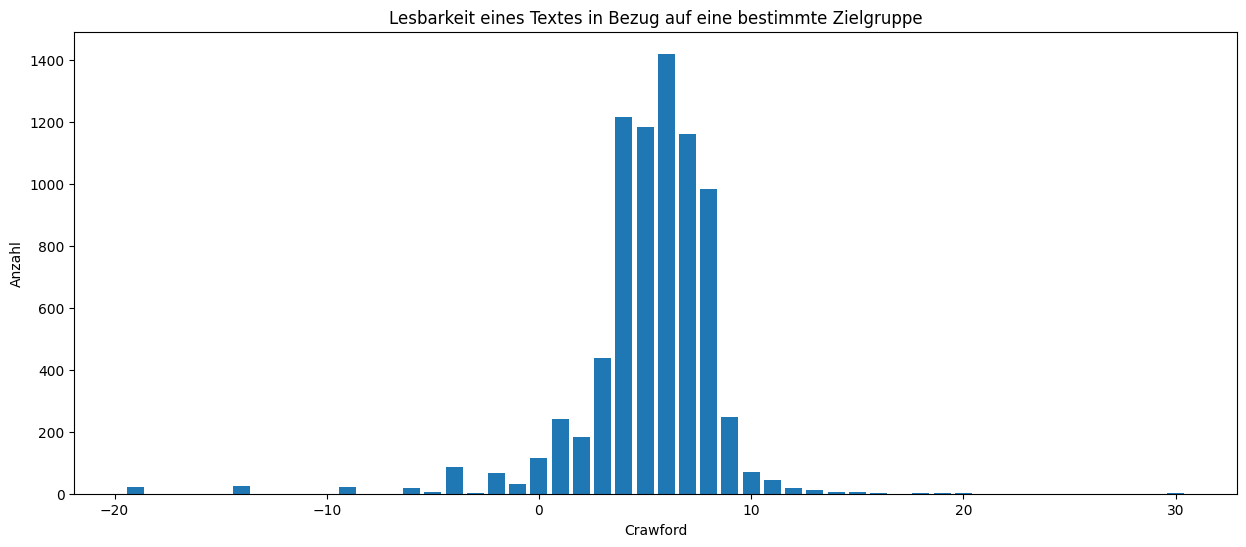

In [29]:
# Graphik
# Gruppieren nach Score Stufen
c_grouped_df = df_c.groupby('crawford')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(c_grouped_df['crawford'], c_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes in Bezug auf eine bestimmte Zielgruppe")
plt.xlabel('Crawford')
plt.ylabel('Anzahl')
plt.show()

## Reading Time

--> Berechnung der Zeit in Minuten, welche benötigt wird, um einen Text zu lesen

https://homepages.inf.ed.ac.uk/keller/papers/cognition08a.pdf

In [30]:
# Definiere der Funktion
def reading_time(translated_text):
    return textstat.reading_time(translated_text)

# Anwendung der Funktion
df_rt = df_german.copy()
df_rt['reading_time'] = df_rt['Translation'].apply(reading_time)
df_rt['reading_time'] = df_rt['reading_time'].round().astype(int)

# Ausgabe
#df_rt

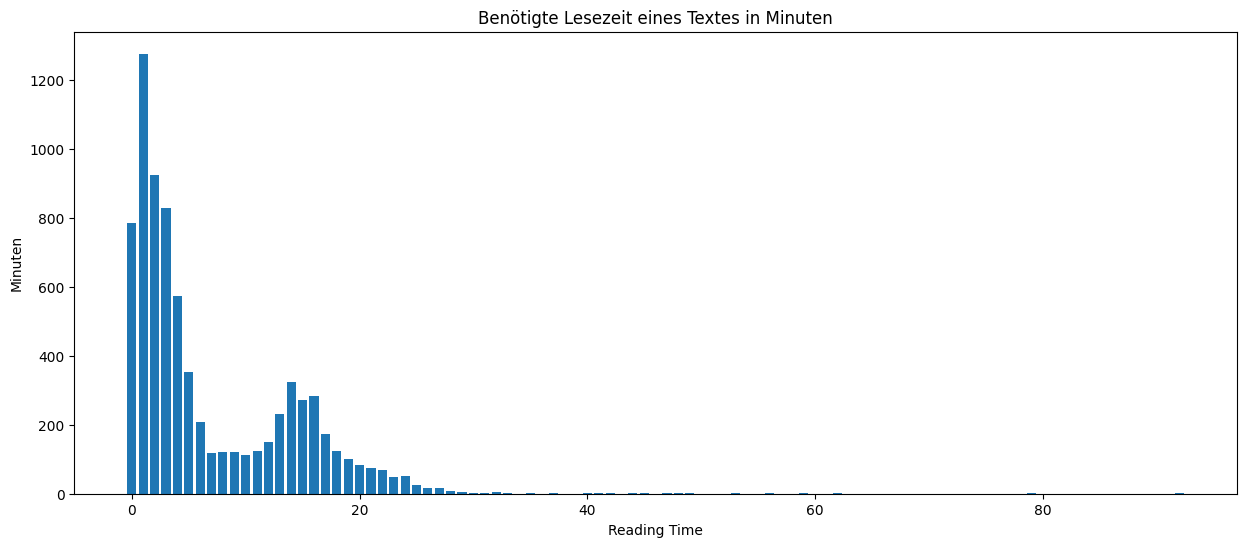

In [31]:
# Graphik
# Gruppieren nach Score Stufen
rt_grouped_df = df_rt.groupby('reading_time')['Language'].count().reset_index().rename(columns={'Language': 'Minuten'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(rt_grouped_df['reading_time'], rt_grouped_df['Minuten'])
plt.title("Benötigte Lesezeit eines Textes in Minuten")
plt.xlabel('Reading Time')
plt.ylabel('Minuten')
plt.show()

## Wiener Sachtextformel

--> Verständlichkeit von Sachtexten mit Fokus auf die deutsche Sprache.

Die Wiener Sachtextformel berechnet die Lesbarkeit eines Textes, indem sie die durchschnittliche Satzlänge (WSL) und die durchschnittliche Silbenanzahl pro Wort (WLL) berücksichtigt. 

Die Formel lautet:

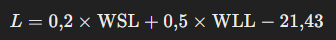

Je höher der Wert, desto leichter die Lesbarkeit.

In [57]:
# Definiere der Funktion
def wiener_sachtextformel(translated_text):
    return textstat.wiener_sachtextformel(translated_text, variant=1)

# Erzeugen eines neuen Data Frames
df_ws = df_german.copy()

# Herausfiltern der leeren Werte
t_list = df_ws.Translation.to_list()
error_list = []
for el in t_list:
    try:
        vienna = textstat.wiener_sachtextformel(el, variant=1)
    except:
        error_list.append(el)

df_ws = df_ws[~df_ws['Translation'].isin(error_list)]

# Anwendung der Funktion
df_ws['wiener_sachtextformel'] = df_ws['Translation'].apply(wiener_sachtextformel)
df_ws['wiener_sachtextformel'] = df_ws['wiener_sachtextformel'].round().astype(int)

# Ausgabe
#df_ws

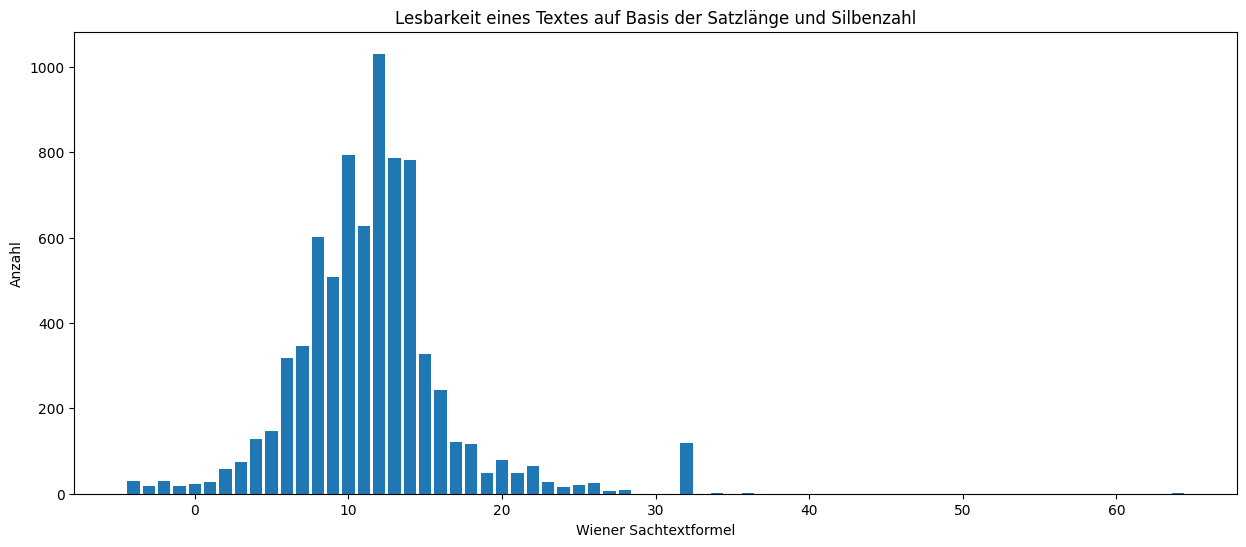

In [58]:
# Graphik
# Gruppieren nach Score Stufen
ws_grouped_df = df_ws.groupby('wiener_sachtextformel')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(ws_grouped_df['wiener_sachtextformel'], ws_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes auf Basis der Satzlänge und Silbenzahl")
plt.xlabel('Wiener Sachtextformel')
plt.ylabel('Anzahl')
plt.show()

# Counts

In [ ]:
# Definiere die Funktion
def calculate_text_metrics(translated_text):
    metrics = {
        'szigriszt_pazos': textstat.szigriszt_pazos(translated_text),                       # Silben
        'lexicon_count': textstat.lexicon_count(translated_text, removepunct=True),         # Lexikon
        'sentence_count': textstat.sentence_count(translated_text),                         # Sätze
        'char_count': textstat.char_count(translated_text, ignore_spaces=True),             # Zeichen
        'letter_count': textstat.letter_count(translated_text, ignore_spaces=True),         # Buchstaben
        'polysyllab_count': textstat.polysyllabcount(translated_text),                      # Silben (>3)
        'monosyllab_count': textstat.monosyllabcount(translated_text)                       # Einsilbige Wörter
    }
    return metrics


# Anwenden der Funktion
df_metrics = df_german.copy()
series_metrics = df_metrics['Translation'].apply(calculate_text_metrics).apply(pd.Series)
df_metrics = pd.concat([df_metrics, series_metrics], axis=1)
df_metrics['szigriszt_pazos'] = df_metrics['szigriszt_pazos'].round().astype(int)

# Ausgabe
#df_metrics


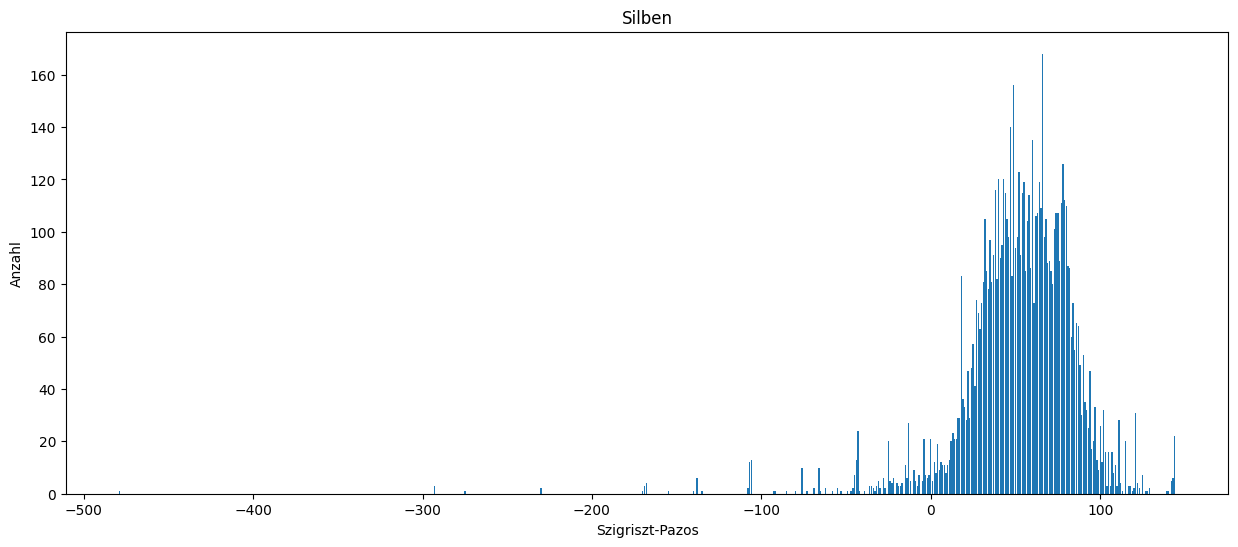

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
sp_grouped_df = df_metrics.groupby('szigriszt_pazos')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(sp_grouped_df['szigriszt_pazos'], sp_grouped_df['Anzahl'])
plt.title("Silben")
plt.xlabel('Szigriszt-Pazos')
plt.ylabel('Anzahl')
plt.show()

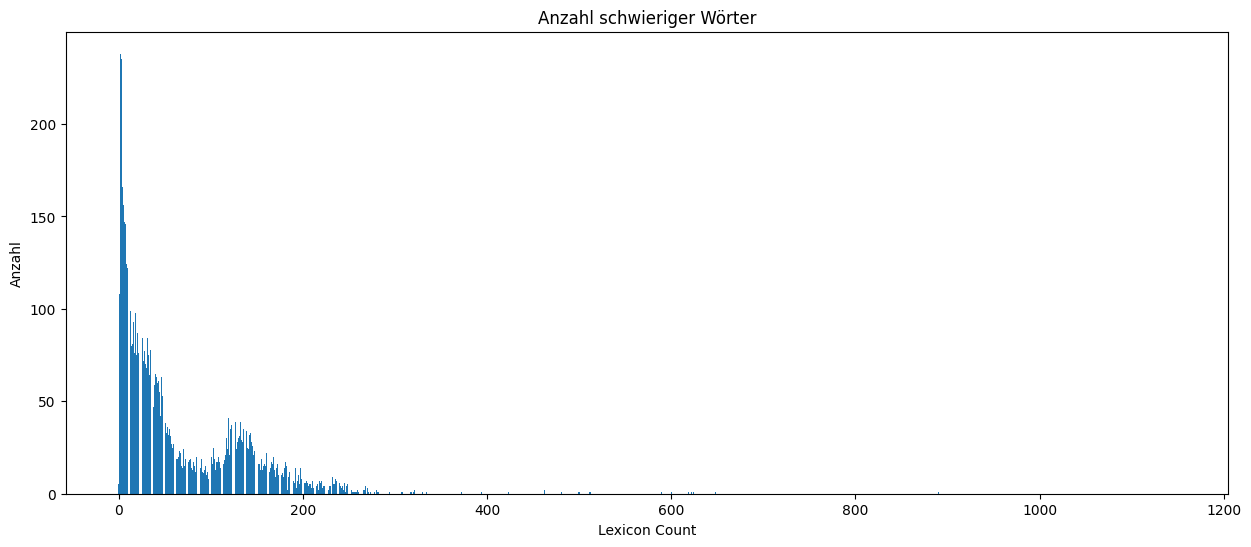

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
lc_grouped_df = df_metrics.groupby('lexicon_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(lc_grouped_df['lexicon_count'], lc_grouped_df['Anzahl'])
plt.title("Anzahl schwieriger Wörter")
plt.xlabel('Lexicon Count')
plt.ylabel('Anzahl')
plt.show()

In [ ]:
lexikon = df_metrics[df_metrics['lexicon_count'] == 5]['Translation']
print(lexikon)

206                   Eine stützende und bequeme Passform
213          Unterstützt seitliche und lineare Bewegungen
224                            TESTEN SIE HIER IHR WISSEN
290       Nicht ausgestellt, tief ausgeschnitten, Knöchel
541                       Rippbündchen an Ärmeln und Saum
                              ...                        
7515                   Frühzeitiger Zugang: 20. Juni 2023
7593    GW1179 MED / H03673 WD FTWRWHITE/LUCIDBLUE/SIL...
7594    GW1178 MED / HO3672 WD COREBLACK/DKSILVMET/SIL...
7595    HP2223 MED / H03674 WD FTWRWHITE/COREBLACK/SEM...
7596    HP2224 MED FTWRWHITE/COLLENAVY/SOLARGOLD DTC E...
Name: Translation, Length: 156, dtype: object


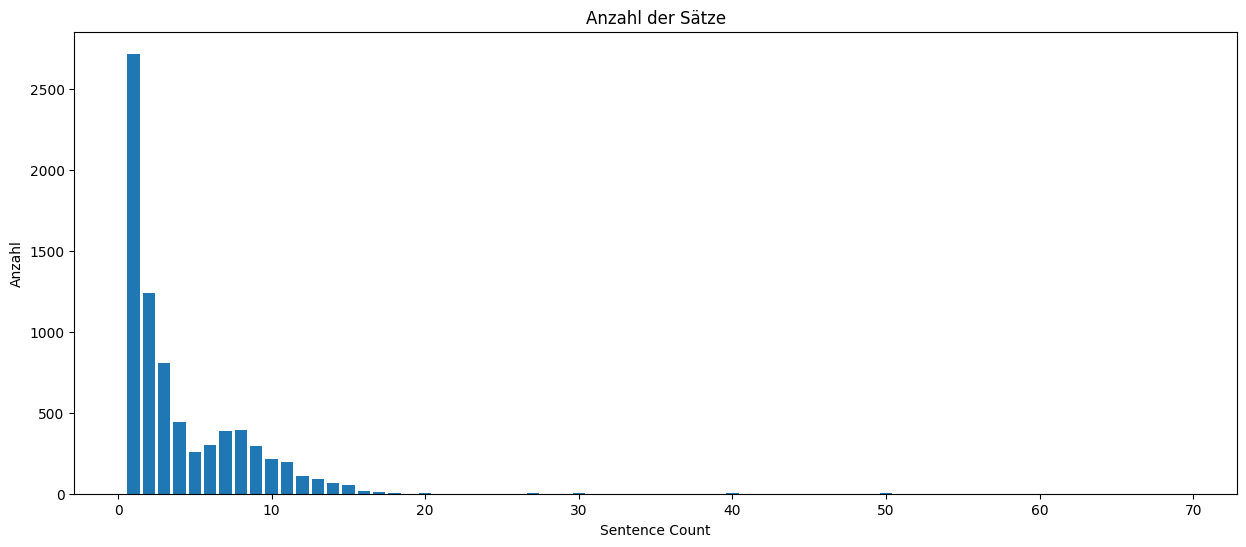

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
sc_grouped_df = df_metrics.groupby('sentence_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(sc_grouped_df['sentence_count'], sc_grouped_df['Anzahl'])
plt.title("Anzahl der Sätze")
plt.xlabel('Sentence Count')
plt.ylabel('Anzahl')
plt.show()

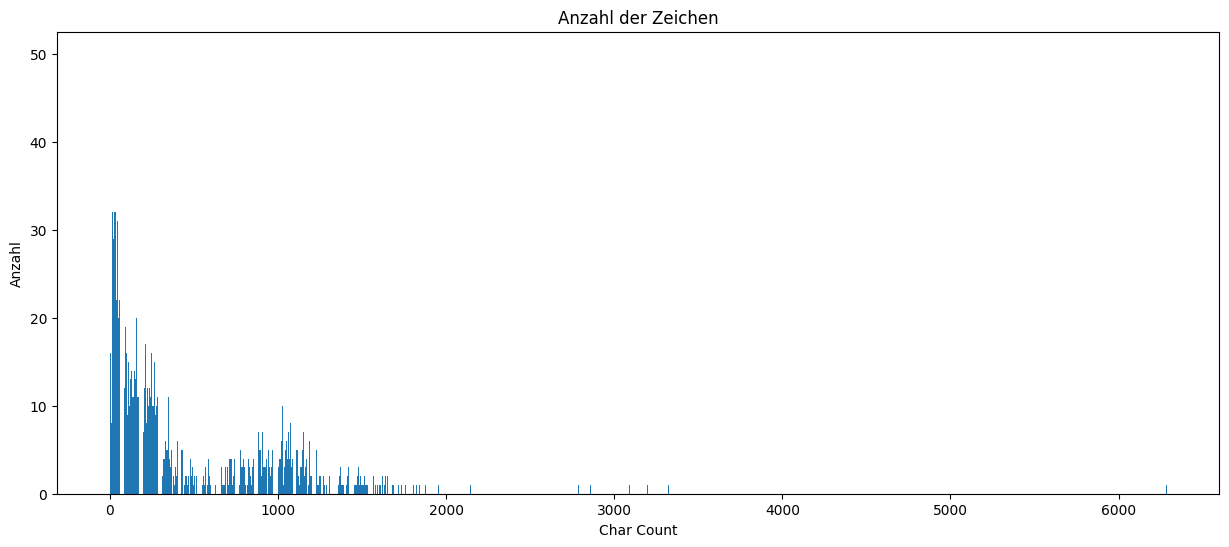

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
cc_grouped_df = df_metrics.groupby('char_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(cc_grouped_df['char_count'], cc_grouped_df['Anzahl'])
plt.title("Anzahl der Zeichen")
plt.xlabel('Char Count')
plt.ylabel('Anzahl')
plt.show()

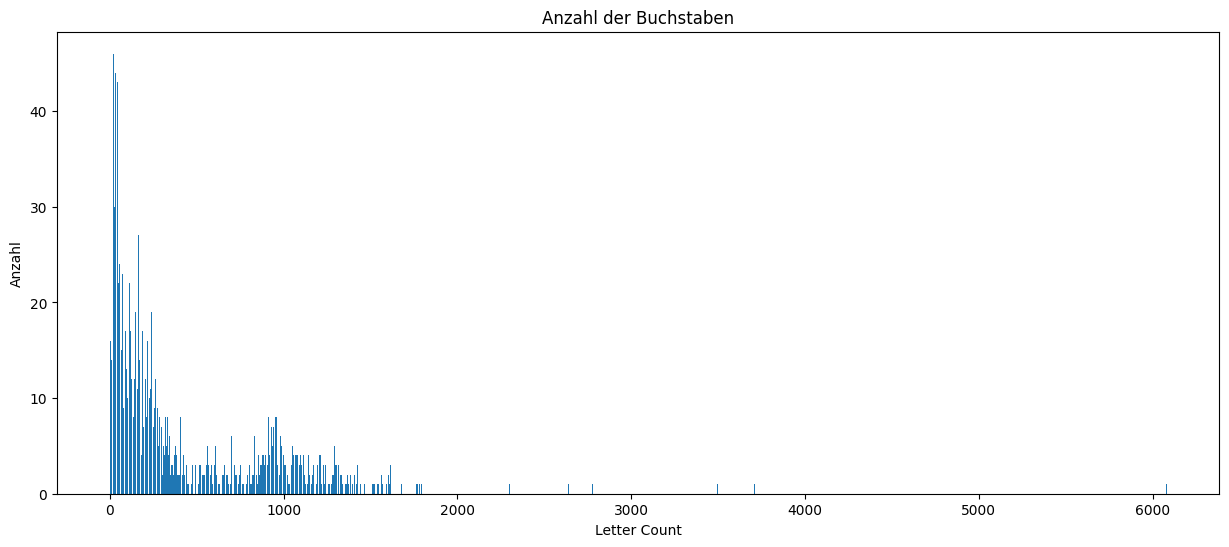

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
lc_grouped_df = df_metrics.groupby('letter_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(lc_grouped_df['letter_count'], lc_grouped_df['Anzahl'])
plt.title("Anzahl der Buchstaben")
plt.xlabel('Letter Count')
plt.ylabel('Anzahl')
plt.show()

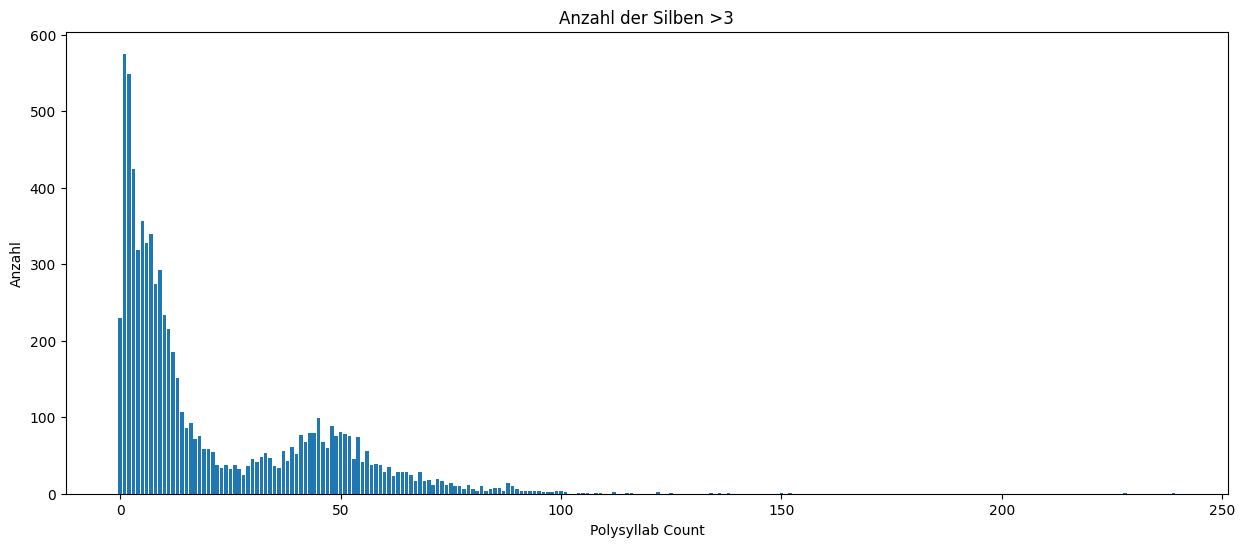

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
p_grouped_df = df_metrics.groupby('polysyllab_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(p_grouped_df['polysyllab_count'], p_grouped_df['Anzahl'])
plt.title("Anzahl der Silben >3")
plt.xlabel('Polysyllab Count')
plt.ylabel('Anzahl')
plt.show()

In [ ]:
silben = df_metrics[df_metrics['polysyllab_count'] == 79]['Translation']
print(silben)

351     Modellnummer: MLE48 Sportkategorie: SCHWIMMEN ...
1175    Modellnummer: LWE87Sportkategorie: LaufenSchne...
1753    Modellnummer: LZO15 Sportkategorie: TENNIS Die...
4869    Modellnummer: BWJ91Sportkategorie: FOOTBALL/FU...
4891    WAS IST NEU &amp; STORYTELLINGWir entwickeln d...
6272    Modellnummer: LRH50 Sportkategorie: HIKING Vie...
6274    Modellnummer: LRH49 Sportkategorie: HIKING Vie...
6384    Modellnummer: MCO36Kategorie Sport: OUTDOORLei...
6563    Modellnummer: DJD04Sportkategorie: RADSPORTEin...
6572    Modellnummer: BUT21 Sportkategorie: RADSPORT G...
6768    Modellnummer: MDK83Sportkategorie: GOLFPremium...
7034    Modellnummer: MDK97 Sportkategorie: RUNNING Di...
Name: Translation, dtype: object


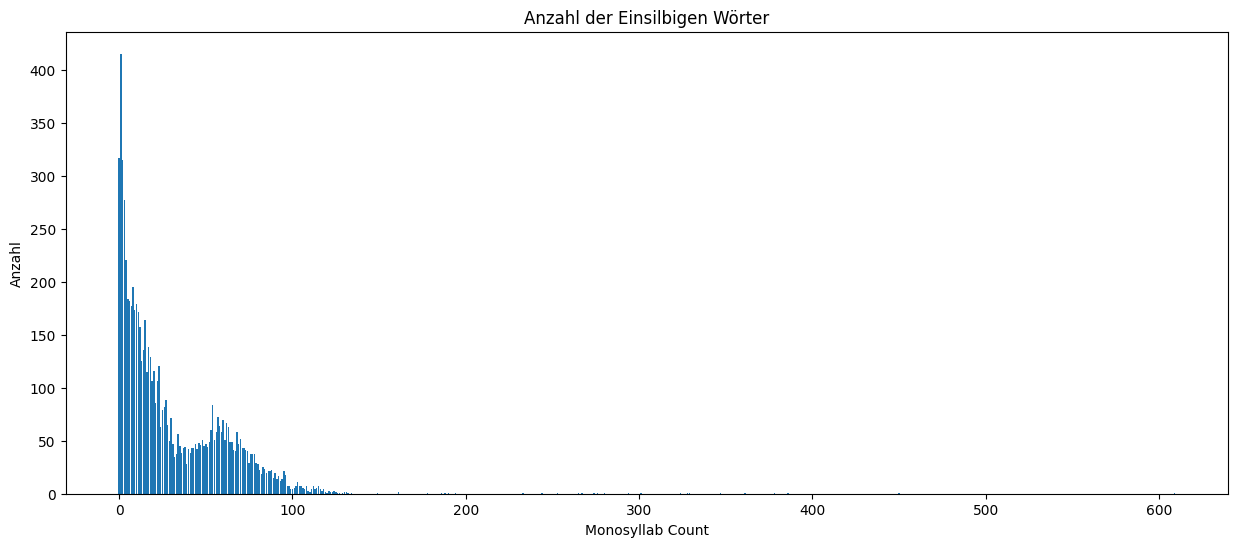

In [ ]:
# Graphik
# Gruppieren nach Score Stufen
m_grouped_df = df_metrics.groupby('monosyllab_count')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(m_grouped_df['monosyllab_count'], m_grouped_df['Anzahl'])
plt.title("Anzahl der Einsilbigen Wörter")
plt.xlabel('Monosyllab Count')
plt.ylabel('Anzahl')
plt.show()

## Sprachenspezifische Metriken

- https://pypi.org/project/textstat/
- https://www.spanishreadability.com/
- https://legible.es/blog/lecturabilidad-fernandez-huerta/

In [ ]:
# Spanisch 
textstat.szigriszt_pazos(test_data)
textstat.fernandez_huerta(test_data)
textstat.crawford(test_data)

# Osman (Arabic)
textstat.osman(text)

# Gulpease Index (Italian)
textstat.gulpease_index(text)